# Exercici 2.10. E-commerce Analytics - Avançat

Importa les llibreries necessàries

pandas, numpy, matplotlib, seaborn

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Llig els CSV i mostra les primeres files

Mostra head() de cada DataFrame

Revisa info() i shape

In [2]:
print("=== PRODUCTS")
products = pd.read_csv('./data/ecom_products.csv')
print(products.head())
print("\n=== CUSTOMERS")
customers = pd.read_csv('./data/ecom_customers.csv')
print(customers.head())
print("\n=== TRANSACTIONS")
orders = pd.read_csv('./data/ecom_transactions.csv')
print(orders.head())

=== PRODUCTS
   product_id       name category   price
0           1  Product 1   Sports  491.79
1           2  Product 2   Beauty  202.42
2           3  Product 3     Home  409.13
3           4  Product 4   Beauty  400.18
4           5  Product 5   Beauty   79.61

=== CUSTOMERS
   customer_id  age       city registration_date
0         1001   48    Alacant        2022-02-22
1         1002   48    Alacant        2023-10-05
2         1003   76   València        2019-10-23
3         1004   66     Madrid        2022-09-12
4         1005   58  Barcelona        2019-07-02

=== TRANSACTIONS
   transaction_id  customer_id  product_id  quantity        date
0               1         2487          39         1  2023-04-07
1               2         2786          99         2  2021-10-11
2               3         2592         128         1  2021-01-25
3               4         2380         128         5  2023-08-22
4               5         1070         196         3  2022-03-30


Uneix les dades

Crea df_sales combinant:

transactions + products (product_id)

customers (customer_id)

In [10]:
df_sales = orders.merge(products, on='product_id', how='left').merge(customers, on='customer_id', how='left')
print(df_sales.head())
print(df_sales.shape)

   transaction_id  customer_id  product_id  quantity        date         name  \
0               1         2487          39         1  2023-04-07   Product 39   
1               2         2786          99         2  2021-10-11   Product 99   
2               3         2592         128         1  2021-01-25  Product 128   
3               4         2380         128         5  2023-08-22  Product 128   
4               5         1070         196         3  2022-03-30  Product 196   

      category   price  age       city registration_date  
0  Electronics  444.45   64  Barcelona        2021-11-13  
1      Fashion  108.41   59    Alacant        2023-05-23  
2       Sports  420.27   58     Madrid        2022-12-03  
3       Sports  420.27   28     Madrid        2022-01-23  
4         Home  434.26   52    Alacant        2023-10-18  
(10000, 11)


Calcula la facturació

Afig columna revenue = price * quantity

In [11]:
df_sales['revenue'] = df_sales['price'] * df_sales['quantity']
df_sales.head()

,transaction_id,customer_id,product_id,quantity,date,name,category,price,age,city,registration_date,revenue
0,1,2487,39,1,2023-04-07,Product 39,Electronics,444.45,64,Barcelona,2021-11-13,444.45
1,2,2786,99,2,2021-10-11,Product 99,Fashion,108.41,59,Alacant,2023-05-23,216.82
2,3,2592,128,1,2021-01-25,Product 128,Sports,420.27,58,Madrid,2022-12-03,420.27
3,4,2380,128,5,2023-08-22,Product 128,Sports,420.27,28,Madrid,2022-01-23,2101.35
4,5,1070,196,3,2022-03-30,Product 196,Home,434.26,52,Alacant,2023-10-18,1302.78


Gràfic 1 — Heatmap d’ingressos per categoria i ciutat

Taula creuada: categoria × ciutat

Representació: sns.heatmap()

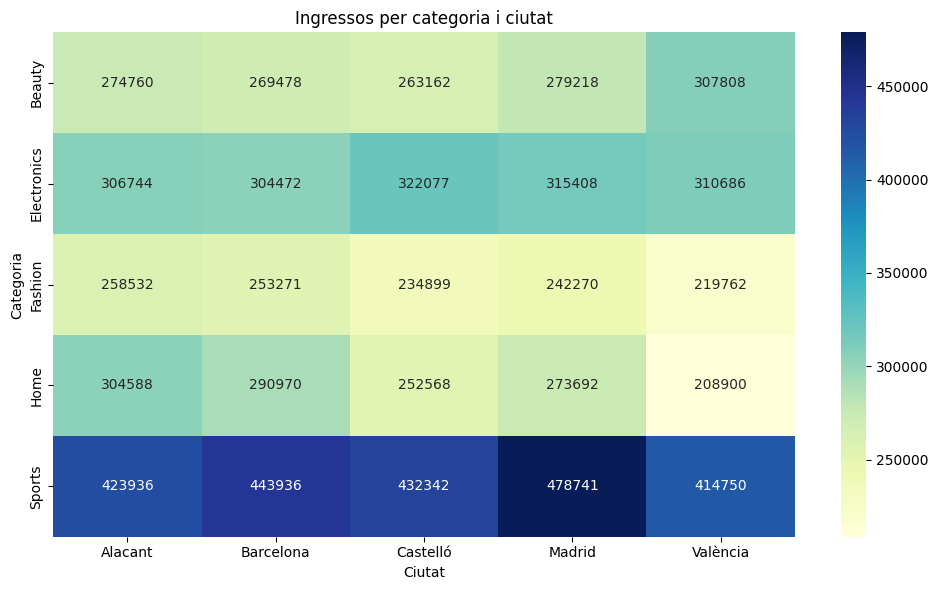

In [12]:
pivot_rev = df_sales.pivot_table(index='category', columns='city', values='revenue', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_rev, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Ingressos per categoria i ciutat')
plt.ylabel('Categoria')
plt.xlabel('Ciutat')
plt.tight_layout()

Gràfic 2 — Violinplot del preu dels productes segons categoria

Comparació de distribucions

Categories amb preus més dispersos

C:\Users\alanr\AppData\Local\Temp\ipykernel_15356\3658617756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=products, x='category', y='price', inner='quartile', palette='Set2')


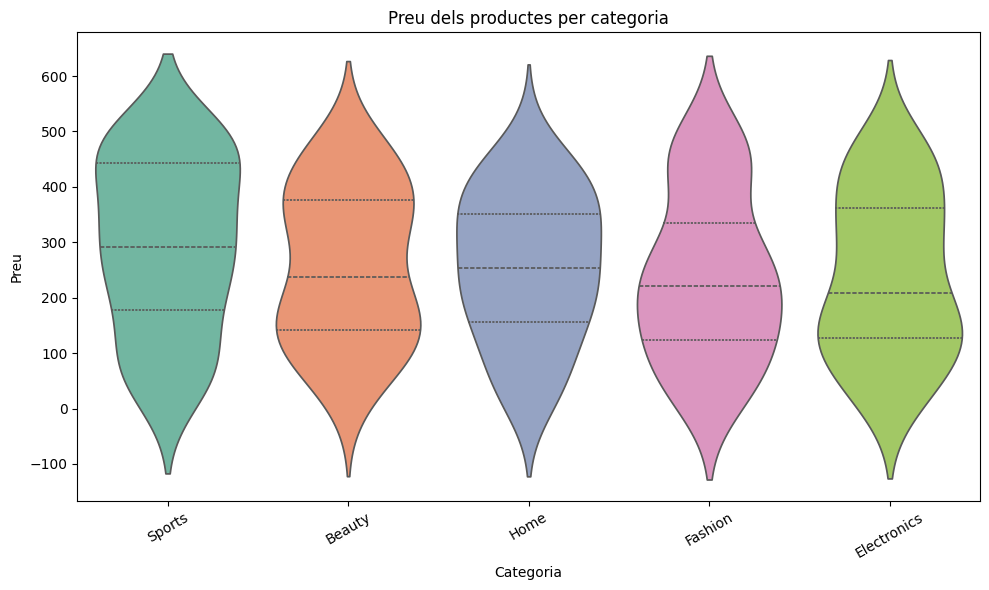

In [6]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=products, x='category', y='price', inner='quartile', palette='Set2')
plt.title('Preu dels productes per categoria')
plt.xlabel('Categoria')
plt.ylabel('Preu')
plt.xticks(rotation=30)
plt.tight_layout()

Anàlisi temporal

Converteix la data

Agrupa per mes i representa un lineplot amb l’evolució d’ingressos

C:\Users\alanr\AppData\Local\Temp\ipykernel_15356\41246603.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rev = df_sales.groupby(pd.Grouper(key='date', freq='M'))['revenue'].sum().reset_index()


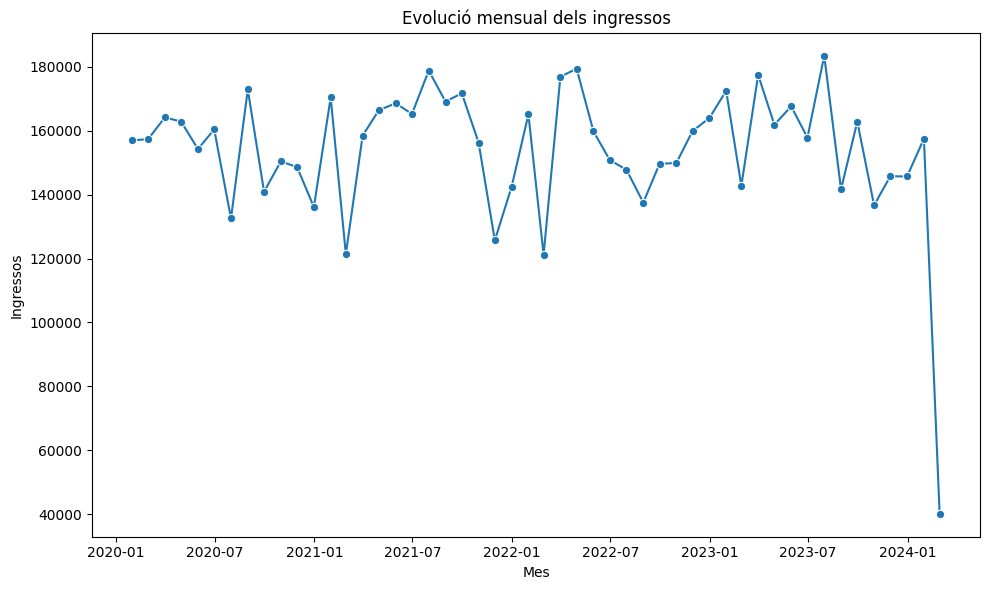

In [13]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
monthly_rev = df_sales.groupby(pd.Grouper(key='date', freq='M'))['revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_rev, x='date', y='revenue', marker='o')
plt.title('Evolució mensual dels ingressos')
plt.xlabel('Mes')
plt.ylabel('Ingressos')
plt.tight_layout()

Càlcul del LTV (Lifetime Value)

Ingressos totals per client

Histograma de distribució d’LTV

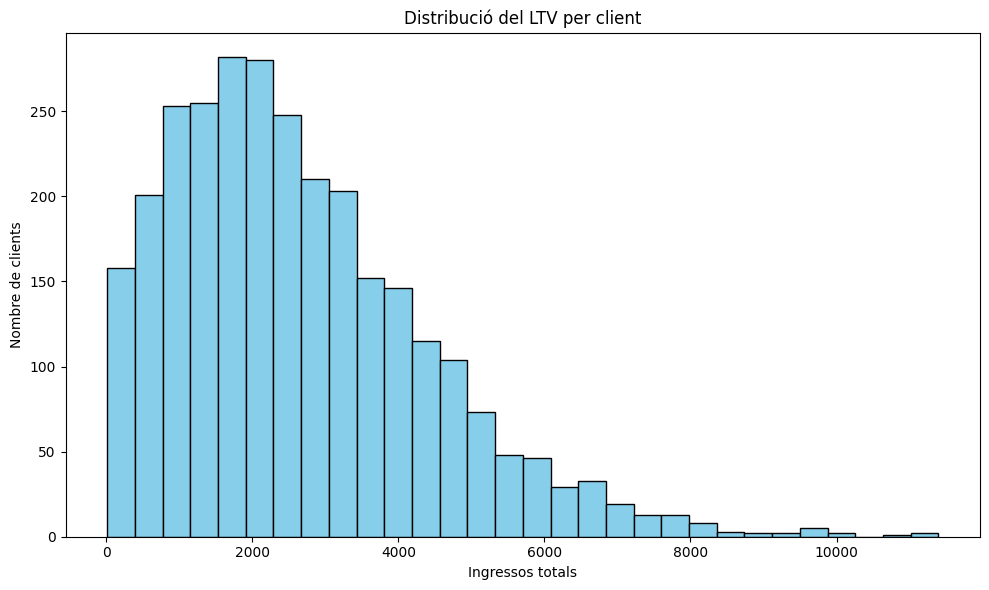

In [14]:
ltv = df_sales.groupby('customer_id')['revenue'].sum().reset_index(name='ltv')
plt.figure(figsize=(10, 6))
plt.hist(ltv['ltv'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribució del LTV per client')
plt.xlabel('Ingressos totals')
plt.ylabel('Nombre de clients')
plt.tight_layout()

Correlació

Correlació entre edat i despesa total

Scatterplot + línia de regressió

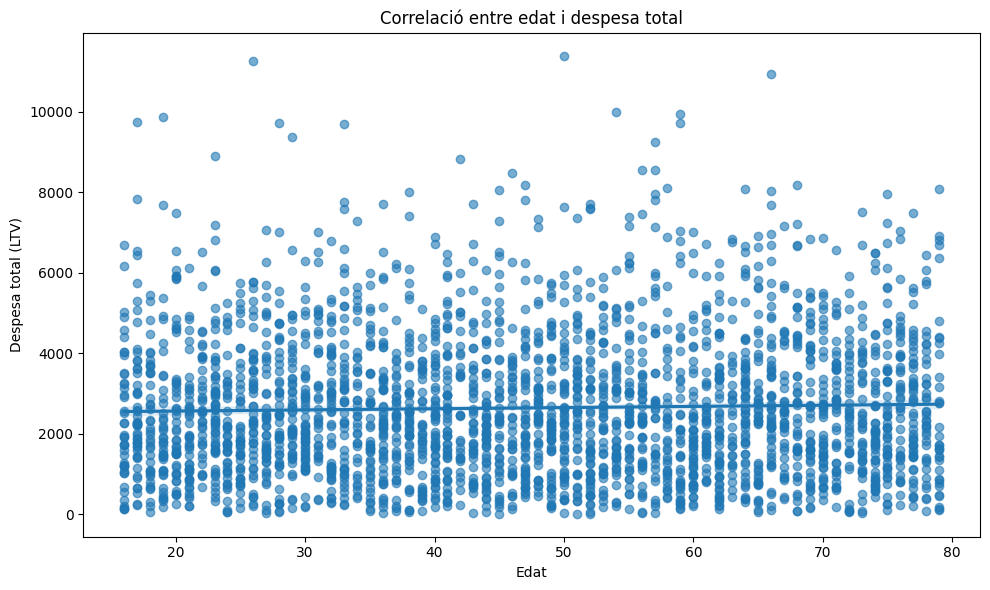

In [15]:
ltv_customers = ltv.merge(customers[['customer_id', 'age']], on='customer_id', how='left')
plt.figure(figsize=(10, 6))
sns.regplot(data=ltv_customers, x='age', y='ltv', scatter_kws={'alpha': 0.6})
plt.title('Correlació entre edat i despesa total')
plt.xlabel('Edat')
plt.ylabel('Despesa total (LTV)')
plt.tight_layout()